In [1]:
# Load the TensorBoard notebook extension
# In colab this can be done prior to the pip install above.
# I added the pip install since it was done in the dev summit 2019 video
%load_ext tensorboard.notebook

In [2]:
# google collab 

#from google.colab import drive
#drive.mount('/content/gdrive')

In [24]:
import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
print(tf.__version__)

2.0.0-alpha0


In [26]:
#from google.colab import files
#uploaded = files.upload()

In [27]:
# google collab version
#CSV_FILE_NAME = "usgs_gsvb_v2.csv"
# jupyter notebook version
CSV_FILE_NAME = "../csv/usgs_gsvb_v2.csv"
os.environ['CSV_FILE_NAME'] = CSV_FILE_NAME

In [28]:
LOG_DIR_NAME = "logs"
os.environ['LOG_DIR_NAME'] = LOG_DIR_NAME

In [29]:
%%bash
echo ${LOG_DIR_NAME}

logs


In [52]:
%%bash
# clear any logs from previous runs
rm -rf ./${LOG_DIR_NAME}

In [53]:
%%bash
head ${CSV_FILE_NAME}

usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long
GSVB,33670001,2019-03-08,-6.7913385826771648,-6.7257217847769031,,36.735303,-76.011602
GSVB,33670001,2019-03-19,-6.8569553805774275,-6.758530183727034,,36.735303,-76.011602
GSVB,33670001,2019-02-21,1.9356955380577427,2.1325459317585302,,36.735303,-76.011602
GSVB,33670001,2019-03-11,-6.66010498687664,-6.4304461942257216,,36.735303,-76.011602
GSVB,33670001,2019-04-04,1.9028871391076114,2.0669291338582676,,36.735303,-76.011602
GSVB,33670001,2019-02-14,1.7716535433070866,1.9356955380577427,,36.735303,-76.011602
GSVB,33670001,2019-04-14,2.2309711286089238,2.39501312335958,,36.735303,-76.011602
GSVB,33670001,2019-02-24,2.65748031496063,2.9527559055118111,,36.735303,-76.011602
GSVB,33670001,2019-01-12,2.2965879265091864,2.39501312335958,,36.735303,-76.011602


In [54]:
%%bash
# this csv file has 9875 lines corresponding to records (plus one header row)
wc -l ${CSV_FILE_NAME}

    9876 ../csv/usgs_gsvb_v2.csv


# Use generic python to read data into pandas dataframe

In [72]:
# try again, but this time lets omit any samples which have missing values
raw_dataset = pd.read_csv(CSV_FILE_NAME, 
                          header=0,
                          parse_dates=[2],
                          sep=",")

dataset = raw_dataset.copy()

## In order to add default values for missing data, use the converters helper functions

In [73]:
# Create a function to look for nans in the dataframe
# call via nans(dataset)
nans = lambda df: df[df.isnull().any(axis=1)]

In [74]:
# This should show an empty set
nans(dataset)

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long
0,GSVB,33670001,2019-03-08,-6.791339,-6.725722,NaN,36.735303,-76.011602
1,GSVB,33670001,2019-03-19,-6.856955,-6.758530,NaN,36.735303,-76.011602
2,GSVB,33670001,2019-02-21,1.935696,2.132546,NaN,36.735303,-76.011602
3,GSVB,33670001,2019-03-11,-6.660105,-6.430446,NaN,36.735303,-76.011602
4,GSVB,33670001,2019-04-04,1.902887,2.066929,NaN,36.735303,-76.011602
5,GSVB,33670001,2019-02-14,1.771654,1.935696,NaN,36.735303,-76.011602
6,GSVB,33670001,2019-04-14,2.230971,2.395013,NaN,36.735303,-76.011602
7,GSVB,33670001,2019-02-24,2.657480,2.952756,NaN,36.735303,-76.011602
8,GSVB,33670001,2019-01-12,2.296588,2.395013,NaN,36.735303,-76.011602
9,GSVB,33670001,2019-02-07,2.034121,2.198163,NaN,36.735303,-76.011602


In [75]:
dataset.dropna(inplace=True)
nans(dataset)

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long


In [76]:
dataset.shape
#dataset.head()

(5972, 8)

# Removing the NA's, removes all of the gsvb sensor readings

In [77]:
dataset[dataset.usgs == 'GSVB']

,usgs,site_no,date,tidal_high,tidal_low,precipitation_inches,lat,long


In [78]:
# drop any columns which we will not use
dataset.drop(['usgs','tidal_low','site_no'], axis=1, inplace=True)
dataset.head()

,date,tidal_high,precipitation_inches,lat,long
851,2017-05-12,2.78,0.95,36.841139,-76.057139
852,2017-07-14,1.07,0.23,36.841139,-76.057139
853,2017-06-20,1.28,0.23,36.841139,-76.057139
854,2018-03-11,0.66,0.11,36.841139,-76.057139
855,2018-04-24,1.28,0.48,36.841139,-76.057139


# Create new columns for year, month, day from the date column

In [79]:
def create_ymd_cols(df, column):
    df[column + "_year"] = df[column].apply(lambda x: x.year)
    df[column + "_month"] = df[column].apply(lambda x: x.month)
    df[column + "_day"] = df[column].apply(lambda x: x.day)
    
create_ymd_cols(dataset, 'date')

In [80]:
dataset.head()

,date,tidal_high,precipitation_inches,lat,long,date_year,date_month,date_day
851,2017-05-12,2.78,0.95,36.841139,-76.057139,2017,5,12
852,2017-07-14,1.07,0.23,36.841139,-76.057139,2017,7,14
853,2017-06-20,1.28,0.23,36.841139,-76.057139,2017,6,20
854,2018-03-11,0.66,0.11,36.841139,-76.057139,2018,3,11
855,2018-04-24,1.28,0.48,36.841139,-76.057139,2018,4,24


In [81]:
# remove the date column
dataset.pop('date')
dataset.head()

,tidal_high,precipitation_inches,lat,long,date_year,date_month,date_day
851,2.78,0.95,36.841139,-76.057139,2017,5,12
852,1.07,0.23,36.841139,-76.057139,2017,7,14
853,1.28,0.23,36.841139,-76.057139,2017,6,20
854,0.66,0.11,36.841139,-76.057139,2018,3,11
855,1.28,0.48,36.841139,-76.057139,2018,4,24


In [82]:
train_ds = dataset.sample(frac=0.7,random_state=3367)
leftover_ds = dataset.drop(train_ds.index)
test_ds = leftover_ds.sample(frac=0.5, random_state=3367)
valid_ds = leftover_ds.drop(test_ds.index)

In [83]:
# Create seperate series/dataframe? for labels
# Remove the label from the dataframes.
train_labels = train_ds.pop('tidal_high')
test_labels = test_ds.pop('tidal_high')
valid_labels = valid_ds.pop('tidal_high')

# Normalize the data

In [84]:
train_stats_df = train_ds.copy()
# remove the lat, long and date columns
train_stats_df.pop('lat')
train_stats_df.pop('long')
train_stats = train_stats_df.describe().transpose()


In [85]:
def norm(a_df):
    # Since data used to normalize data is only for numeric columns,
    # the data column is not present.  Remove this column, do the normalize
    # operation and then join back the date column
    
    # create a date dataframe from one column. 
    # Use the list selector for a single column to make it a df instead of a series
    #
    # Also don't normalize lat and longs
    the_dates_df = a_df[['lat','long']]
    # remove the date column since its saved now.
    a_df.pop('lat')
    a_df.pop('long')
    # Do the norm operation
    normed_df = (a_df - train_stats['mean']) / train_stats['std']
    # add back the date column to normalized dataframe
    normed_df = the_dates_df.join(normed_df)
    return normed_df

normed_train_ds = norm(train_ds)
normed_test_ds = norm(test_ds)
normed_valid_ds = norm(valid_ds)

# Build the model again

In [86]:
# train_ds determines the input feature size
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_ds.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])


# Train the model again  (tensorboard version)

In [102]:
%%bash
# clear any logs from previous runs
rm -rf ./${LOG_DIR_NAME}

In [103]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 825), started 1:06:02 ago. (Use '!kill 825' to kill it.)

In [104]:
EPOCHS = 1000

logdir = os.path.join(LOG_DIR_NAME, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
print(logdir)

history = model.fit(normed_train_ds, 
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[tensorboard_callback])

logs/20190505-203906


# Train the model again (history plots) version

In [90]:
%%bash
# clear any logs from previous runs
pwd
rm -rf ./${LOG_DIR_NAME}

/Users/davis/progs/tf-hackathon/src


In [92]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [93]:
# The author is printing dots rather than the regular output. Interesting.
# Also, the author is saving the result of model.fit and then loads the history portion
# into a dataframe later
EPOCHS = 1000

history = model.fit(normed_train_ds, 
                    train_labels,
                    epochs=EPOCHS, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

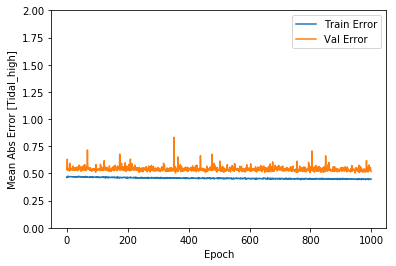

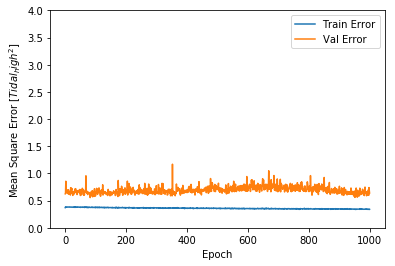

In [98]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Tidal_high]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Tidal_high^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],label = 'Val Error')
  plt.ylim([0,4])
  plt.legend()
  plt.show()


plot_history(history)

In [95]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [96]:
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,0.371007,0.462730,0.371007,0.624666,0.538677,0.624666,0
1,0.384536,0.470416,0.384536,0.642854,0.543909,0.642854,1
2,0.379222,0.469046,0.379222,0.857007,0.630957,0.857007,2
3,0.384676,0.473754,0.384676,0.737791,0.527548,0.737790,3
4,0.383097,0.473190,0.383097,0.643091,0.544249,0.643091,4
5,0.380166,0.469934,0.380166,0.658068,0.534901,0.658068,5
6,0.382449,0.471658,0.382450,0.650231,0.539320,0.650231,6
7,0.379305,0.467478,0.379305,0.697280,0.530074,0.697280,7
8,0.382797,0.468424,0.382797,0.630875,0.541774,0.630875,8
9,0.381275,0.469435,0.381275,0.631923,0.522713,0.631923,9


Hmm, this also does not show any improvement.  To sum up, we have omitted the greenstream sensors, we have included the date.  The lat,long is not normalized and it is not bucketized.